In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
#problem 5 #speaks to the problem of linear regression being linear always going up, means it adjusts the values badly to fix error for giving value +3 instead of +1

# Problems 5-6

In [4]:
def get_columns(A,col):
    return [x[col] for x in A]
def multiply(A,B):
    k = [[[A[x][a] * get_columns(B,y)[a] for a in range(len(B))] for y in range(len(B[0]))] for x in range(len(A))]
    k = [[sum(y) for y in x] for x in k]
    return k
def calc(X,w):
    return [np.sum(np.dot(x,w)) for x in X]   

class linreg():
    def __init__(self,X,y):
        self.Xorig = X
        self.X = np.concatenate([[[1]for x in range(len(X))],X],axis=1)
        self.y = y
        self.XT = np.transpose(self.X)
        self.XXT = multiply(self.XT,self.X)
        #self.iX = inverse(self.XXT)
        self.iX = np.linalg.pinv(self.XXT)
        self.w = multiply(multiply(self.iX,self.XT),self.y) #use np.dot or np.matmul- np.multiply is different
        self.preds = calc(self.X,self.w)
        
        #self.plot()
        
    def plot(self):
        plt.plot(self.Xorig,self.preds)
        plt.plot(self.Xorig,self.y,"o")
        plt.vlines(self.Xorig, self.y, self.preds, colors='k', linestyles='solid', label='')
        plt.show()
    
X = [[1],[2],[3],[4]]
y = [[0],[2],[3],[4]]
linregLine = linreg(X,y)
linregLine.w

[[-0.9999999999999936], [1.2999999999999985]]

In [41]:
class Line():
    def __init__(self, p):
        self.p1 = p[0]
        self.p2 = p[1]
        self.slope = (self.p1[1]-self.p2[1])/(self.p1[0]-self.p2[0])
        self.b = self.p1[1]-self.slope*self.p1[0]
    def calculate(self,x):
        return self.slope*x+self.b
    def plot(self):
        x = np.random.uniform(-1,1,10)
        plt.plot(x,self.calculate(x))
    def find_actual_y(self,points):
        return [np.sign(p[1] - self.calculate(p[0])) for p in points] #higher than line = 1


class Plot():
    def LR_line(self,x):
        w0 = self.weights[0]
        w1 = self.weights[1]
        w2 = self.weights[2]
        return (-w0-(x*w1))/w2
    def plotLR(self):
        k = np.concatenate([np.array(self.X),np.array(self.y).reshape(-1,1)],axis=1)
        df = pd.DataFrame(k, columns = ["p1","p2","y"])
        plt.scatter(df[df["y"]==-1].p1,df[df["y"]==-1].p2, color="r")
        plt.scatter(df[df["y"]==1].p1,df[df["y"]==1].p2, color="g")

        plt.plot([-1,1],[self.slope*x +self.b for x in [-1,1]], label="real split")
        plt.plot([-1,1],[self.LR_line(x) for x in [-1,1]], label="linear regression")
        
        plt.legend()
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        plt.show()
        
class create_test(Line, Plot):
    def __init__(self,N):
        
        self.create_line()
        
        #create points and real vals
        self.N = N
        self.X = [np.random.uniform(-1.0,1.0,2) for x in range(self.N)]
        self.y = np.array(self.find_actual_y(self.X)).reshape(-1,1)
        
        self.linreg = linreg(self.X,self.y)
        self.weights = np.array(self.linreg.w)[:,0]
        #self.plotLR()
        self.preds = np.sign(self.linreg.preds)
        
        self.Ein_error = self.Ein_error()
        self.Eout_error = self.Eout_error()
    def create_line(self):
        p = [np.random.uniform(-1.0,1.0,2) for x in range(2)]
        while p[0][0] == p[1][0] and p[0][1] == p[1][1]:
            p = [np.random.uniform(-1.0,1.0,2) for x in range(2)]
        super().__init__(p)
        
    def Ein_error(self):
        return sum(self.preds != self.y.reshape(1,-1)[0])/self.N
    def Eout_error(self):
        false = 0
        for x in range(1000):
            point = np.random.uniform(-1.0,1.0,2)
            y = self.find_actual_y([point])
            pred = np.sign(np.dot(np.concatenate([[1],point]), self.weights))
            if y != pred:
                false += 1
        return false/1000

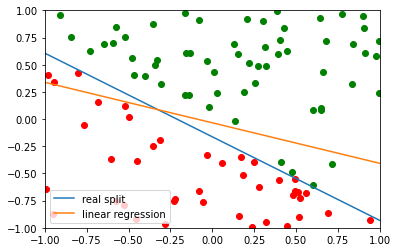

In [246]:
ex = create_test(100) #graph of linear regression line does not say anything about y or whether classifies as positive or negative just shows value for where y=0 at each x1 value. you can find slopes using the graph though

In [247]:
ex.weights

array([0.04272011, 0.46564085, 1.25080048])

In [11]:
class run_experiment():
    def __init__(self,N, M):
        self.N = N
        self.M = M #in this case, M is # of experiments
        self.run() 
    def run(self):
        ein = []
        eout = []
        for x in range(self.M):
            test = create_test(100)
            ein.append(test.Ein_error)
            eout.append(test.Eout_error)
        EinError = np.mean(ein)
        EoutError = np.mean(eout)
        
        print("Ein Error %s" % EinError)
        print("Eout Error %s" % EoutError) 
           
            
            

In [12]:
run_experiment(100,100)

Ein Error 0.038
Eout Error 0.048530000000000004


In [135]:
np.mean([1,2])

1.5

# Problems 5,6,7

In [59]:
class Line():
    def __init__(self, p):
        super().__init__()
        self.p1 = p[0]
        self.p2 = p[1]
        self.slope = (self.p1[1]-self.p2[1])/(self.p1[0]-self.p2[0])
        self.b = self.p1[1]-self.slope*self.p1[0]
    def calculate(self,x):
        return self.slope*x+self.b
    def plot(self):
        x = np.random.uniform(-1,1,10)
        plt.plot(x,self.calculate(x))
    def find_actual_y(self,points):
        return [np.sign(p[1] - self.calculate(p[0])) for p in points] #higher than line = 1


class Plot():
    def PLA_line(self,x):
        w0 = self.weights[0]
        w1 = self.weights[1]
        w2 = self.weights[2]
        return (-w0-(x*w1))/w2
    def LR_line(self,x):
        w0 = self.LRweights[0]
        w1 = self.LRweights[1]
        w2 = self.LRweights[2]
        return (-w0-(x*w1))/w2
    def plotLR(self):
        k = np.concatenate([np.array(self.X),np.array(self.y).reshape(-1,1)],axis=1)
        df = pd.DataFrame(k, columns = ["p1","p2","y"])
        plt.scatter(df[df["y"]==-1].p1,df[df["y"]==-1].p2, color="r")
        plt.scatter(df[df["y"]==1].p1,df[df["y"]==1].p2, color="g")

        plt.plot([-1,1],[self.slope*x +self.b for x in [-1,1]], label="real split")
        plt.plot([-1,1],[self.LR_line(x) for x in [-1,1]], label="linear regression")
        plt.plot([-1,1],[self.PLA_line(x) for x in [-1,1]], label="PLA")
        
        plt.legend()
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        plt.show()

class Model():
    def predict_from_point(self, point):
        val = np.dot(point, self.weights)
        return np.sign(val)
    def adjust_weights(self, point,y):
        point = [1]+list(point) #1 for threshold
        if y == self.predict_from_point(point):
            return True
        else:
            self.weights = self.weights + np.multiply(y, point) #can change threshold too
            return False
        
        
        
        
class create_test(Line, Model, Plot):
    def __init__(self,N):
        
        self.create_line()
        
        #create points and real vals
        self.N = N
        self.X = [np.random.uniform(-1.0,1.0,2) for x in range(self.N)]
        self.y = np.array(self.find_actual_y(self.X)).reshape(-1,1)
        
        self.linreg = linreg(self.X,self.y)
        self.weights = np.array(self.linreg.w)[:,0]
        self.LRweights = self.weights
        
        #linreg error
        self.preds = np.sign(self.linreg.preds)
        self.Ein_error = self.Ein_error()
        self.Eout_error = self.Eout_error()
        
        self.runPLA()
        
        #self.plotLR()
        
        
    def create_line(self):
        p = [np.random.uniform(-1.0,1.0,2) for x in range(2)]
        while p[0][0] == p[1][0] and p[0][1] == p[1][1]:
            p = [np.random.uniform(-1.0,1.0,2) for x in range(2)]
        super().__init__(p)
    
    def runPLA(self):
        self.num_iters = 0
        
        while True:
            val = random.randint(0,self.N-1)
            acc = self.adjust_weights(self.X[val],self.y[val])
            if acc:
                #check if all are accurate if it comes back as true for random point, if so then stop
                for val in range(self.N):
                    if self.predict_from_point([1]+list(self.X[val]))!= self.y[val]:
                        acc = False
                        break 
                if acc:
                    break
            
            else:
                self.num_iters += 1 # only add iteration if not True because otherwise it did not adjust at all and was already done
        
    def Ein_error(self):
        return sum(self.preds != self.y.reshape(1,-1)[0])/self.N
    def Eout_error(self):
        false = 0
        for x in range(1000):
            point = np.random.uniform(-1.0,1.0,2)
            y = self.find_actual_y([point])
            pred = np.sign(np.dot(np.concatenate([[1],point]), self.LRweights))
            if y != pred:
                false += 1
        return false/1000

In [65]:
class run_experiment():
    def __init__(self,N, M):
        self.N = N
        self.M = M #in this case, M is # of experiments
        self.run() 
    def run(self):
        ein = []
        eout = []
        num_iters = []
        for x in range(self.M):
            test = create_test(self.N)
            ein.append(test.Ein_error)
            eout.append(test.Eout_error)
            num_iters.append(test.num_iters)
        EinError = np.mean(ein)
        EoutError = np.mean(eout)
        NumIters = np.mean(num_iters)
        print("Ein Error %s" % EinError)
        print("Eout Error %s" % EoutError) 
        print("Num Iters %s" % NumIters)   
            
            

In [70]:
run_experiment(10,100)

Ein Error 0.028000000000000004
Eout Error 0.10734
Num Iters 4.89


# Problem 8

In [71]:
class Line():
    def find_actual_y(self,points):
        return [np.sign(p[0]**2+p[1]**2-.6) for p in points] #higher than line = 1


        
class create_test(Line, Model, Plot):
    def __init__(self,N):
        
        #create points and real vals
        self.N = N
        self.X = [np.random.uniform(-1.0,1.0,2) for x in range(self.N)]
        self.y = self.find_actual_y(self.X)
        self.create_noise()
        
        self.y = np.array(self.y).reshape(-1,1)
        self.linreg = linreg(self.X,self.y)
        self.weights = np.array(self.linreg.w)[:,0]
        self.LRweights = self.weights
        
        
        #linreg error
        self.preds = np.sign(self.linreg.preds)
        self.Ein_error = self.Ein_error()
        
    
    
    def create_noise(self):
        noise = random.sample(range(len(self.y)),int(len(self.y)/10))
        self.y = [self.y[x] if x not in noise else -self.y[x] for x in range(len(self.y))]
        
    def Ein_error(self):
        return sum(self.preds != self.y.reshape(1,-1)[0])/self.N
    

In [72]:
test = create_test(1000)
test.Ein_error

0.573

In [233]:
class run_experiment():
    def __init__(self,N, M):
        self.N = N
        self.M = M
        self.run() 
    def run(self):
        ein = []

        for x in range(self.M):
            test = create_test(100)
            ein.append(test.Ein_error)

        EinError = np.mean(ein)

        print("Ein Error %s" % EinError)


            

In [234]:
run_experiment(1000,100)

Ein Error 0.44309999999999994


# Problem 9

In [295]:
class Line():
    def find_actual_y(self,points):
        return [np.sign(p[0]**2+p[1]**2-.6) for p in points] #higher than line = 1



        
class create_test(Line, Model, Plot):
    def __init__(self,N):
        
        #create points and real vals
        self.N = N
        self.X = [np.random.uniform(-1.0,1.0,2) for x in range(self.N)]
        self.y = self.find_actual_y(self.X)
        self.y = self.create_noise(self.y)
        self.y = np.array(self.y).reshape(-1,1)
        self.X = [[x1,x2,x1*x2,x1**2,x2**2] for x1,x2 in self.X]
        self.linreg = linreg(self.X,self.y)
        self.weights = np.array(self.linreg.w)[:,0]
        self.LRweights = self.weights
        
        #self.plotLR()
        
        #linreg error
        self.preds = np.sign(self.linreg.preds)
        self.Ein_error = self.Ein_error()
        self.Eout_error = self.Eout_error()
        
        
    
    def create_noise(self,y):
        noise = random.sample(range(len(y)),int(len(y)/10))
        return [y[x] if x not in noise else -y[x] for x in range(len(y))]
        
    def Ein_error(self):
        return sum(self.preds != self.y.reshape(1,-1)[0])/self.N
    def Eout_error(self):
        false = 0
        EoutX = [np.random.uniform(-1.0,1.0,2) for x in range(1000)]
        EoutX = [[x1,x2,x1*x2,x1**2,x2**2] for x1,x2 in EoutX]
        Eouty = self.find_actual_y(EoutX)
        Eouty = self.create_noise(Eouty)
        self.Eouty = Eouty
        self.EoutX = EoutX
        for x,y in zip(EoutX,Eouty):
            pred = np.sign(np.dot(np.concatenate([[1],x]), self.LRweights))
            if y != pred:
                false += 1
        return false/1000

In [296]:
test = create_test(1000)
test.weights

array([-1.02626897, -0.00803764, -0.00871995,  0.11931693,  1.65429291,
        1.58248924])

In [297]:
test.Eout_error

0.128

In [293]:
class run_experiment():
    def __init__(self,N, M):
        self.N = N
        self.M = M
        self.run() 
    def run(self):
        weights = []
        eouts = []
        for x in range(self.M):
            test = create_test(100)
            weights.append(test.weights)
            eouts.append(test.Eout_error)
        weights = np.mean(weights,axis=0)
        eout = np.mean(eouts)
        print("Weights %s" % weights)
        print("Eout Error %s" % eout)

            

In [298]:
run_experiment(1000,100)

Weights [-1.01433811 -0.00383889 -0.00199546  0.02301527  1.60186245  1.60723453]
Eout Error 0.15636999999999998
